Understanding human emotions paves the way to understanding people's needs better and, ultimately, providing better service. Speech Emotion Recognition (SER) is one of these tasks, aiming to recognize the emotion from speech irrespective of the semantic contents. </br></br>

<b>Data Description:</b> This dataset is a subset of the Toronto emotional speech set (TESS) in which a set of 200 target words were spoken in the carrier phrase "Say the word _____' by multiple actresses (aged 26 and 64 years), and recordings were made of the set portraying each of seven emotions. In this assignment the dataset used in this assignment contains 400 audio clips for 4 emotions: sad, angry, happy, and fear. </br></br>

Please download the dataset here: https://drive.google.com/drive/u/2/folders/14GKIR6RYKCYd-L3ppqfoHMH0anTgiz8H

<h1>Step 1: Split the dataset into training and testing sets.</h1></br>
In the dataset, we have 100 audio clips for each of the abovementioned 4 emotions. For each emotion category, randomly select 70 as training samples and the remaining 30 as testing samples. 

In [30]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

filePath = "data_folder/"
happyFiles = np.array([filename for filename in os.listdir(filePath + "happy")])
sadFiles = np.array([filename for filename in os.listdir(filePath + "sad")])
angryFiles = np.array([filename for filename in os.listdir(filePath + "angry")])
fearFiles = np.array([filename for filename in os.listdir(filePath + "fear")])

happyTrain, happyTest = train_test_split(happyFiles, test_size = 0.3)
sadTrain, sadTest = train_test_split(sadFiles, test_size = 0.3)
angryTrain, angryTest = train_test_split(angryFiles, test_size = 0.3)
fearTrain, fearTest = train_test_split(fearFiles, test_size = 0.3)

len(happyTrain)

70

<h1>Step 2: Exploratory Data Analysis.</h1></br>
This stage is the very initial stage of your data analysis. You may want to know the label distribution of the dataset. You may also want to select sample audio, listen to them and plot them in both the time and frequency domain.

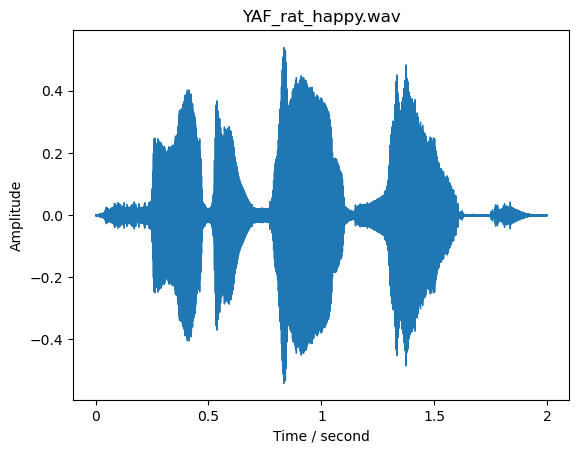

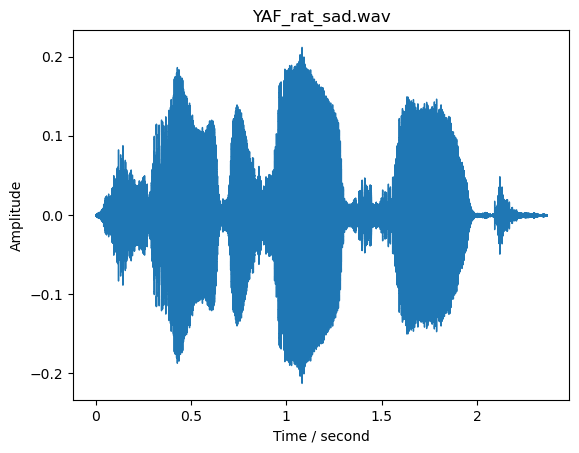

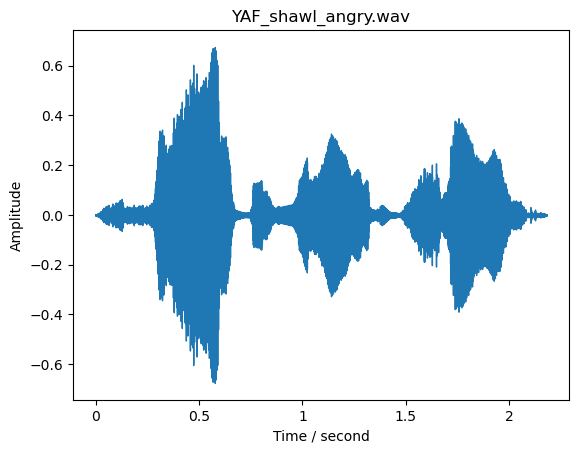

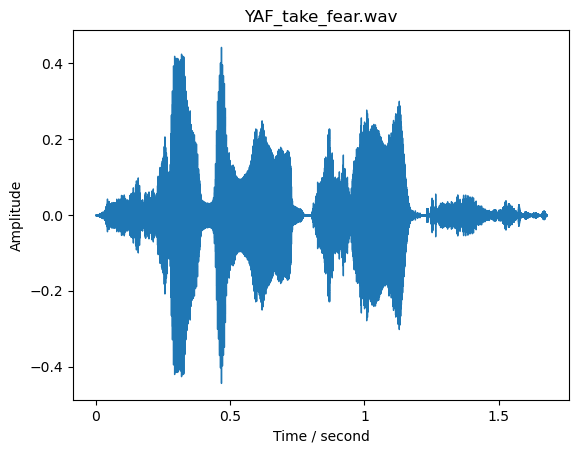

[array([0.00000000e+00, 5.00738049e-01, 1.00147610e+00, ...,
        2.20484978e+04, 2.20489985e+04, 2.20494993e+04]),
 array([0.00000000e+00, 4.23045931e-01, 8.46091861e-01, ...,
        2.20487309e+04, 2.20491539e+04, 2.20495770e+04]),
 array([0.00000000e+00, 4.58839687e-01, 9.17679374e-01, ...,
        2.20486235e+04, 2.20490823e+04, 2.20495412e+04]),
 array([0.00000000e+00, 5.96316629e-01, 1.19263326e+00, ...,
        2.20482111e+04, 2.20488074e+04, 2.20494037e+04])]

In [31]:
from random import randint
import matplotlib.pyplot as plt
import librosa

randInt = [randint(0,len(happyTrain)) for i in range(4)]
paths = [happyTrain[randInt[0]], sadTrain[randInt[1]], angryTrain[randInt[2]], fearTrain[randInt[3]]]
types = ["happy/", "sad/", "angry/", "fear/"]

freqValues = []
for i in range(4):
    
    signal, sample_rate = librosa.load(filePath + types[i] + paths[i])

    plt.figure(i)
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.title(paths[i])
    plt.show()

    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freqValues.append(k/T)

freqValues

<h1>Step 3: Acoustic Feature Extraction.</h1></br>
You will extract acoustic features by using librosa or openSMILE. They are both popular Python libraries for automatic acoustic feature extraction.</br>
librosa: https://librosa.org/doc/main/index.html</br>
openSMILE: https://audeering.github.io/opensmile-python/

In [ ]:
# Feature Extraction
happyTrainMFCC, happyTrainZCR, happyTrainMelSpec = [], []
happyTestMFCC, happyTestZCR, happyTestMelSpec = [], []

happyTrainMFCC, happyTrainZCR, happyTrainMelSpec = [], []
happyTestMFCC, happyTestZCR, happyTestMelSpec = [], []

happyTrainMFCC, happyTrainZCR, happyTrainMelSpec = [], []
happyTestMFCC, happyTestZCR, happyTestMelSpec = [], []

happyTrainMFCC, happyTrainZCR, happyTrainMelSpec = [], []
happyTestMFCC, happyTestZCR, happyTestMelSpec = [], []

In [ ]:
# EXTRACT FEATURES for HAPPY. MFCC + ZCR + MelSpectrogram
for i in happyTrain:
    signal, sample_rate = librosa.load(filePath + "happy/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_ratero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    happyTrainMFCC.append(df_mfccs)
    happyTrainZCR.append(df_zero_crossing_rate)
    happyTrainMelSpec.append(df_mel_spectrogram)

for i in happyTest:
    signal, sample_rate = librosa.load(filePath + "happy/" + i)
    
    df_mfccs = pd.DataFrame()
    df_zero_crossing_rate = pd.DataFrame()
    df_mel_spectrogram = pd.DataFrame()
    
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zero_crossing_ratero_crossing_rate['ZCR'] = zcr[0]

    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
        
    happyTestMFCC.append(df_mfccs)
    happyTestZCR.append(df_zero_crossing_rate)
    happyTestMelSpec.append(df_mel_spectrogram)

In [36]:
# EXTRACT MFCC for SAD
for i in sadTrain:
    signal, sample_rate = librosa.load(filePath + "sad/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    sadTrainMFCC.append(df_mfccs)

for i in sadTest:
    signal, sample_rate = librosa.load(filePath + "sad/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    sadTestMFCC.append(df_mfccs)

len(sadTrainMFCC)

70

In [ ]:
# EXTRACT MFCC for ANGRY
for i in angryTrain:
    signal, sample_rate = librosa.load(filePath + "angry/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    angryTrainMFCC.append(df_mfccs)

for i in angryTest:
    signal, sample_rate = librosa.load(filePath + "angry/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    angryTestMFCC.append(df_mfccs)

len(angryTrainMFCC)

In [ ]:
# EXTRACT MFCC for FEAR
for i in fearTrain:
    signal, sample_rate = librosa.load(filePath + "fear/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    fearTrainMFCC.append(df_mfccs)

for i in fearTest:
    signal, sample_rate = librosa.load(filePath + "fear/" + i)
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    fearTestMFCC.append(df_mfccs)

len(fearTrainMFCC)

In [ ]:
# Feature Extraction: mel spectrogram

# extract for happy


<h1>Step 4: Feature Post-processing.</h1></br>
Please refer to the slide of this class. </br>
Link: https://docs.google.com/presentation/d/1GUF_CaEy5rSnqnlOkxYhHGhfp6-1epCE5Q5BsYOfqt8/edit#slide=id.g1c126e18fd0_2_36

<h1>Step 5: Build your audio emotion recognition model.</h1></br>
Provide the extracted set of acoustic features from the training dataset to your classification model. Note that this is a multi-class classification problem. Please select appropriate classifiers since some of the classifiers are not applicable here (e.g., logistic regression).

<h1>Step 6: Model evaluation.</h1></br>
Evaluate your model performance with the testing dataset. Please compare the performance of different classifiers using the same acoustic feature and the performance of the same classifier using different acoustic features. Finally, discuss your experimental results and submit the assignment report.

In [ ]:
signal, sample_rate = librosa.load('./data_folder/happy/'+happyTrain[0])

# audio feature extraction: loudness
import pandas as pd

# audio feature extraction: mel spectrogram



# combine all features
feature_matrix = pd.concat([df_loudness, df_mfccs, df_zero_crossing_rate, df_chroma, df_mel_spectrogram], axis=1)
print(feature_matrix.head(5))
# feature_matrix.to_csv('feature_matrix.csv')